  # DEVELOPEMENT OF LANGUAGE DETECTION SYSTEM USING MACHINE LEARNING


In [30]:
#IMPORT LIBRARIES


import string
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [31]:
# Load datasets
#df1 = pd.read_csv("C:\\Users\\abhis\\Desktop\\PROJ_DOCS\\dataset.csv")
df = pd.read_csv("C:\\Users\\abhis\\Desktop\\PROJ_DOCS\\Language Detection.csv")
#df3 = pd.read_csv("C:\\Users\\abhis\\Desktop\\PROJ_DOCS\\telugu_sentences_200.csv")


In [32]:
# Concatenate datasets
#df = pd.concat([df1, df2, df3], ignore_index=True)
#df.to_csv('df.csv', index=False)


In [34]:
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


 # Exploratory Data Analysis (EDA)

In [35]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English


In [36]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Text        0
Language    0
dtype: int64


In [37]:
# Display rows and columns in DATAFRAME
df.shape

(10337, 2)

In [38]:
# Check the distribution of languages
print("\nLanguage distribution:")
print(df['Language'].value_counts())



Language distribution:
Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64


In [39]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB
None


In [40]:
# Describe the numerical features
print(df.describe())

                 Text Language
count           10337    10337
unique          10267       17
top     mijn excuses.  English
freq                3     1385


C:\Users\abhis\AppData\Local\Temp\ipykernel_14936\3644990070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Language', data=df, palette='viridis')


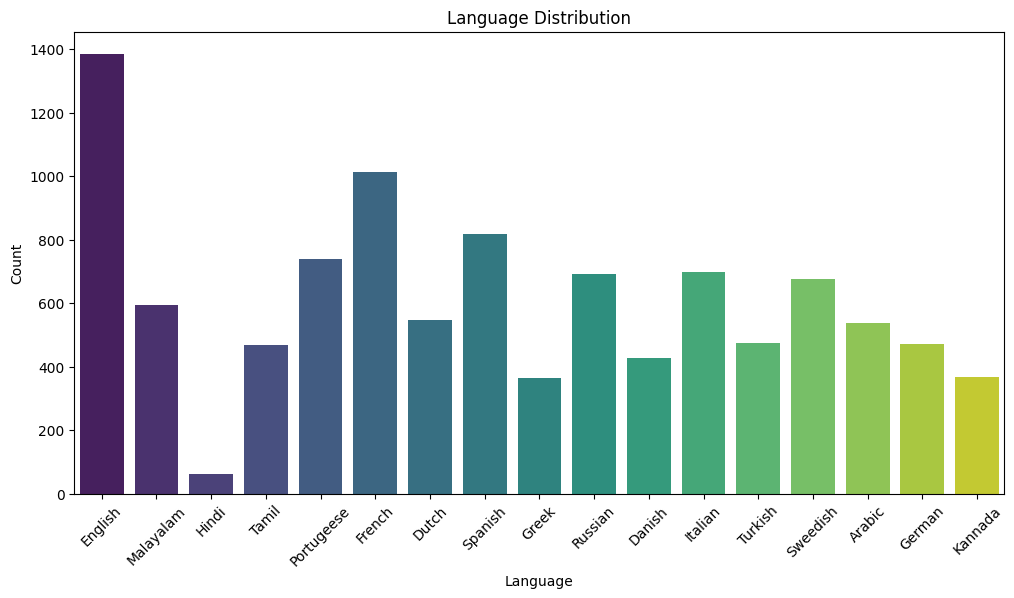

In [41]:
# Bar plot for language distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Language', data=df, palette='viridis')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Text length analysis
df['Text_Length'] = df['Text'].apply(len)
print("\nStatistics of text length:")
print(df['Text_Length'].describe())


Statistics of text length:
count    10337.000000
mean       124.055625
std        253.688194
min          1.000000
25%         43.000000
50%        100.000000
75%        166.000000
max      19088.000000
Name: Text_Length, dtype: float64


In [43]:
# Word count analysis
df['Word_Count'] = df['Text'].apply(lambda x: len(x.split()))
print("\nStatistics of word count:")
print(df['Word_Count'].describe())


Statistics of word count:
count    10337.000000
mean        19.573861
std         48.397149
min          1.000000
25%          7.000000
50%         15.000000
75%         25.000000
max       3735.000000
Name: Word_Count, dtype: float64


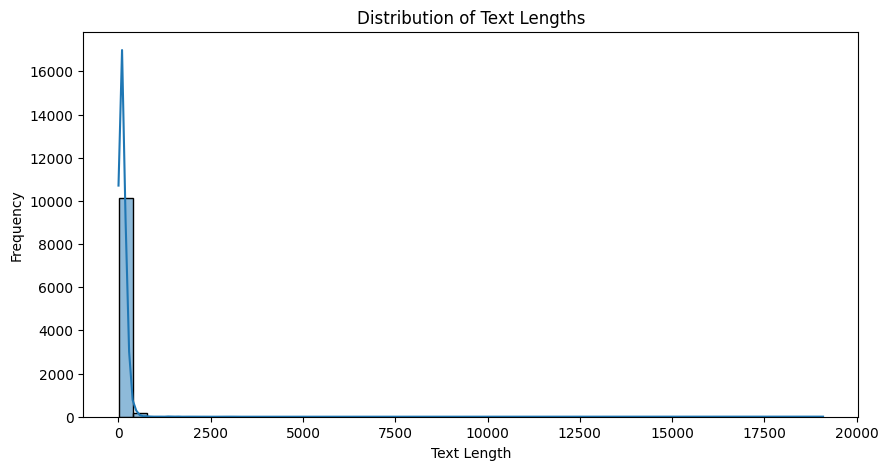

In [44]:
# Plot the distribution of text lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['Text_Length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [45]:

# Correlation analysis
correlation_matrix = df[['Text_Length', 'Word_Count']].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
             Text_Length  Word_Count
Text_Length     1.000000    0.991445
Word_Count      0.991445    1.000000


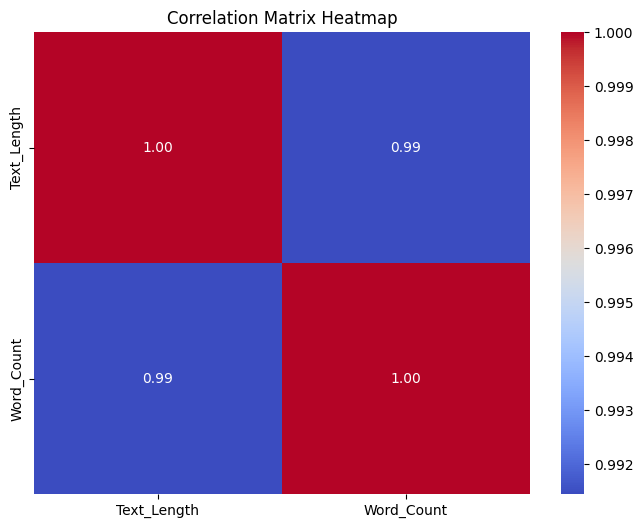

In [46]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [47]:
# Method to remove punctuations and lowercase the text
def remove_pun(text):
    if isinstance(text, str):
        for pun in string.punctuation:
            text = text.replace(pun, "")
        text = text.lower()
    return text

In [48]:
# Apply the remove_pun function to the 'Text' column
df['Text'] = df['Text'].apply(remove_pun)

In [49]:
# Prepare data for model training
X = df['Text'].values  # Feature
y = df['Language'].values  # Target

In [50]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Initialize the vectorizer
vec = TfidfVectorizer(ngram_range=(1, 2), analyzer='char')

In [52]:
# Define individual models
random_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
naive_bayes = MultinomialNB()

In [53]:
# Create a voting classifier with these models
voting_clf = VotingClassifier(
    estimators=[
        ('rf', random_forest),
        ('svm', svm),
        ('nb', naive_bayes)
    ],
    voting='soft'  # Use 'soft' voting to consider predicted probabilities
)

In [54]:
# Create the pipeline for the basic model
basic_model_pipe = Pipeline([
    ('vec', vec),  # Vectorize the input data using TF-IDF
    ('voting_clf', voting_clf)  # Combine models using VotingClassifier
])

In [55]:

# Fit the pipeline on the training data
basic_model_pipe.fit(X_train, y_train)


Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('voting_clf',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(n_jobs=-1,
                                                                      random_state=42)),
                                              ('svm',
                                               SVC(kernel='linear',
                                                   probability=True,
                                                   random_state=42)),
                                              ('nb', MultinomialNB())],
                                  voting='soft'))])

In [56]:
# Make predictions on the test data
y_pred_basic = basic_model_pipe.predict(X_test)

In [57]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_basic) * 100
print("\nTest Accuracy:", accuracy)


Test Accuracy: 97.5338491295938


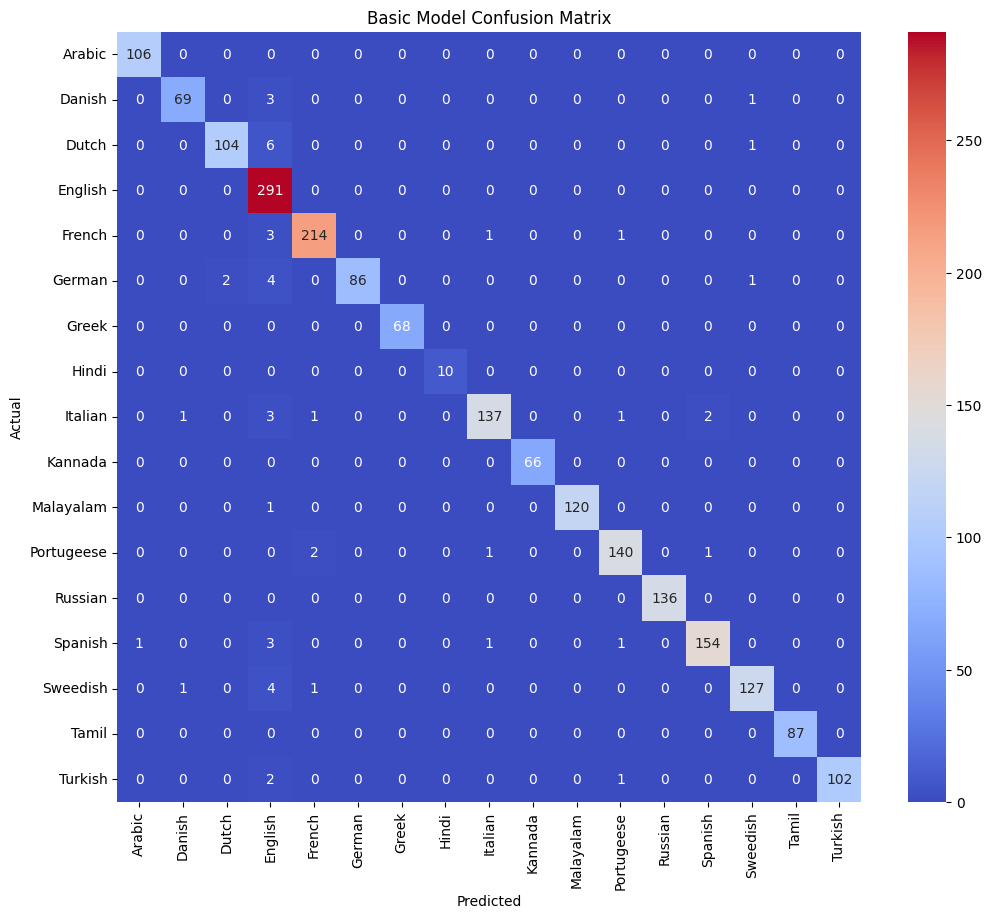

In [58]:
# Confusion Matrix for the basic model
plt.figure(figsize=(12, 10))
cmx_basic = confusion_matrix(y_test, y_pred_basic)
sns.heatmap(cmx_basic, annot=True, fmt="d", cmap='coolwarm', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Basic Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# TESTING 


In [95]:
basic_model_pipe.predict(['उत्तर प्रदेश ब्रेकिंग न्यूज़, पढ़ें 10 अगस्त के मुख्य और ताजा समाचार']) 

array(['Hindi'], dtype=object)

# MODEL EVALUATION

In [62]:
# Evaluate the basic model
basic_accuracy = accuracy_score(y_test, y_pred_basic)
basic_f1 = f1_score(y_test, y_pred_basic, average='weighted')
basic_precision = precision_score(y_test, y_pred_basic, average='weighted')
basic_recall = recall_score(y_test, y_pred_basic, average='weighted')

# Print the evaluation metrics
print(f"Basic Model Evaluation:")
print(f"Accuracy: {basic_accuracy:.2f}")
print(f"F1 Score: {basic_f1:.2f}")
print(f"Precision: {basic_precision:.2f}")
print(f"Recall: {basic_recall:.2f}")


Basic Model Evaluation:
Accuracy: 0.98
F1 Score: 0.98
Precision: 0.98
Recall: 0.98


In [63]:
# Initialize models
random_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
naive_bayes = MultinomialNB()

In [64]:
# Initialize vectorizer
vec = TfidfVectorizer(ngram_range=(1, 2), analyzer='char')

In [65]:
# Function to evaluate model and return metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(vec.fit_transform(X_train), y_train)
    y_pred = model.predict(vec.transform(X_test))
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted')
    }

In [66]:
# Evaluate each model
rf_metrics = evaluate_model(random_forest, X_train, X_test, y_train, y_test)
svm_metrics = evaluate_model(svm, X_train, X_test, y_train, y_test)
nb_metrics = evaluate_model(naive_bayes, X_train, X_test, y_train, y_test)


In [67]:
 # Create a DataFrame to display results
results_df = pd.DataFrame([rf_metrics, svm_metrics, nb_metrics], index=['Random Forest', 'SVM', 'Naive Bayes'])


In [68]:
# Print the results in table form
print("\nModel Evaluation Results:")
results_df


Model Evaluation Results:


,Accuracy,F1 Score,Precision,Recall
Random Forest,0.969536,0.969555,0.969819,0.969536
SVM,0.979207,0.979226,0.979352,0.979207
Naive Bayes,0.742747,0.723013,0.891370,0.742747


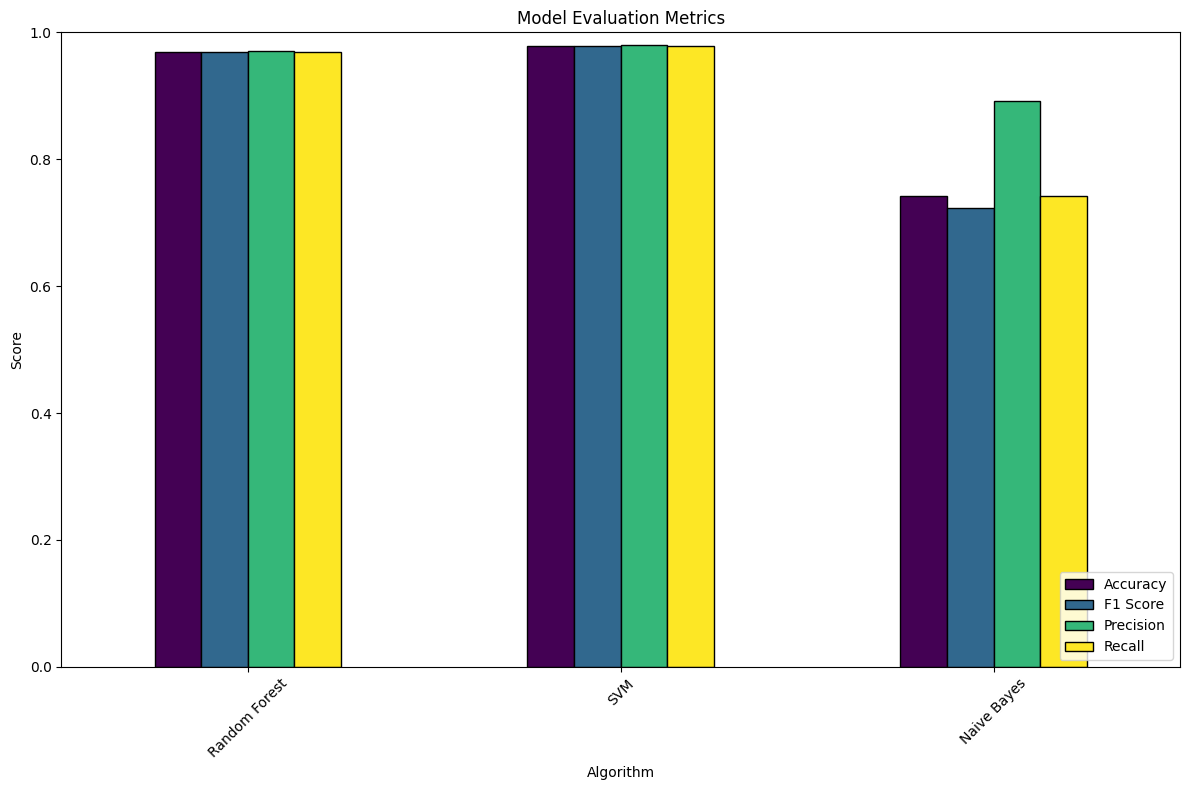

In [69]:
# Plot the evaluation metrics
results_df.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')
plt.title('Model Evaluation Metrics')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.legend(loc='lower right')
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()

# Hyperparameter Tuning

In [70]:
# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

In [71]:
# Define the hyperparameter grid for SVM
svm_param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}

In [72]:
# Define the hyperparameter grid for Naive Bayes
nb_param_grid = {
    'clf__alpha': [0.1, 0.5, 1, 2, 5]  # Smoothing parameter for Naive Bayes
}

In [73]:

# Create a pipeline for Random Forest
rf_pipeline = Pipeline([
    ('vec', vec),
    ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))
])


In [74]:
# Create a pipeline for SVM
svm_pipeline = Pipeline([
    ('vec', vec),
    ('clf', SVC(probability=True, random_state=42))
])

In [75]:
# Create a pipeline for Naive bias

nb_pipeline = Pipeline([
    ('vec', TfidfVectorizer(ngram_range=(1, 3), analyzer='char', max_features=5000)),
    ('clf', MultinomialNB())
])

In [76]:
# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest Parameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 300}


In [77]:
# Perform GridSearchCV for SVM
svm_grid_search = GridSearchCV(estimator=svm_pipeline, param_grid=svm_param_grid, cv=3, n_jobs=-1, verbose=2)
svm_grid_search.fit(X_train, y_train)
print(f"Best SVM Parameters: {svm_grid_search.best_params_}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best SVM Parameters: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}


In [78]:

# Perform GridSearchCV for Naive Bayes
nb_grid_search = GridSearchCV(estimator=nb_pipeline, param_grid=nb_param_grid, cv=3, n_jobs=-1, verbose=2)
nb_grid_search.fit(X_train, y_train)
print(f"Best Naive Bayes Parameters: {nb_grid_search.best_params_}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Naive Bayes Parameters: {'clf__alpha': 0.1}


In [79]:
# Train the best models with the best parameters
best_rf_model = rf_grid_search.best_estimator_
best_svm_model = svm_grid_search.best_estimator_
best_nb_model = nb_grid_search.best_estimator_

In [80]:
# Predictions for hyperparameter tuned models
y_pred_rf = best_rf_model.predict(X_test)
y_pred_svm = best_svm_model.predict(X_test)
y_pred_nb = best_nb_model.predict(X_test)

In [83]:
# Confusion Matrices for tuned models
plt.figure(figsize=(12, 10))


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

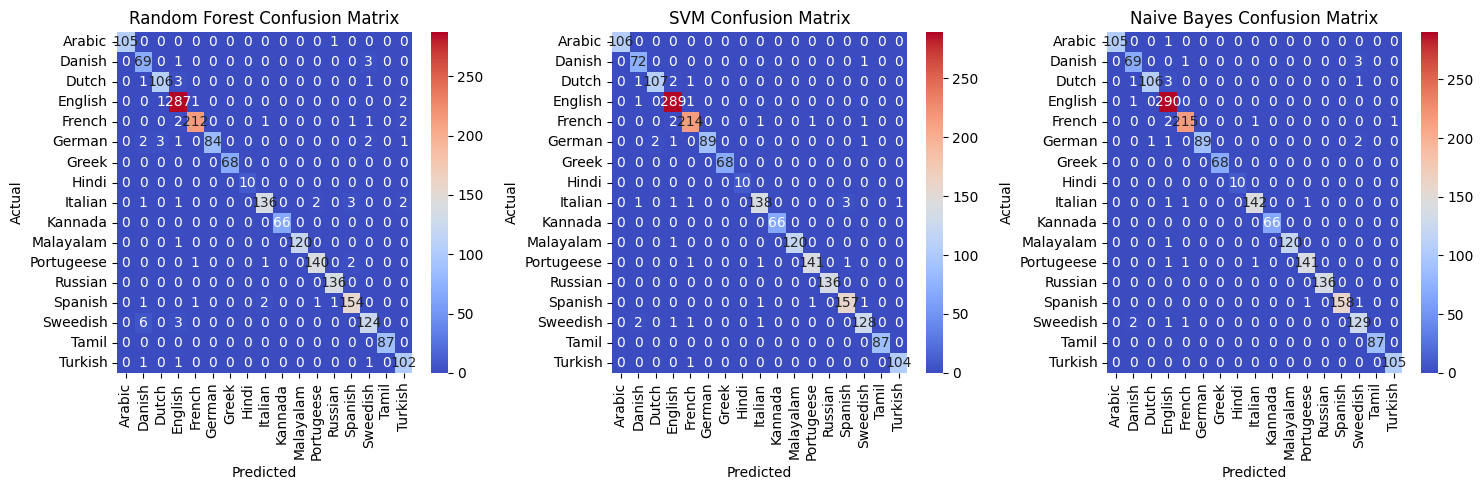

In [87]:
# Confusion Matrices for tuned models
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cmx_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cmx_rf, annot=True, fmt="d", cmap='coolwarm', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
cmx_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cmx_svm, annot=True, fmt="d", cmap='coolwarm', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
cmx_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cmx_nb, annot=True, fmt="d", cmap='coolwarm', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [88]:
# Define the voting classifier with the individual pipelines
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_pipeline),
        ('svm', svm_pipeline),
        ('nb', nb_pipeline)
    ],
    voting='soft'  # Use 'soft' voting to consider predicted probabilities
)

In [89]:
# Create the final pipeline
model_pipe = Pipeline([
    ('voting_clf', voting_clf)  # Combine models using VotingClassifier
])

In [90]:
# Fit the pipeline on the training data
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('voting_clf',
                 VotingClassifier(estimators=[('rf',
                                               Pipeline(steps=[('vec',
                                                                TfidfVectorizer(analyzer='char',
                                                                                ngram_range=(1,
                                                                                             2))),
                                                               ('clf',
                                                                RandomForestClassifier(n_jobs=-1,
                                                                                       random_state=42))])),
                                              ('svm',
                                               Pipeline(steps=[('vec',
                                                                TfidfVectorizer(analyzer='char',
                                                                                ngram_range=(1,
                                                                                             2))),
                                                               ('clf',
                                                                SVC(probability=True,
                                                                    random_state=42))])),
                                              ('nb',
                                               Pipeline(steps=[('vec',
                                                                TfidfVectorizer(analyzer='char',
                                                                                max_features=5000,
                                                                                ngram_range=(1,
                                                                                             3))),
                                                               ('clf',
                                                                MultinomialNB())]))],
                                  voting='soft'))])

In [91]:
# Make predictions on the test data
y_pred_model = model_pipe.predict(X_test)


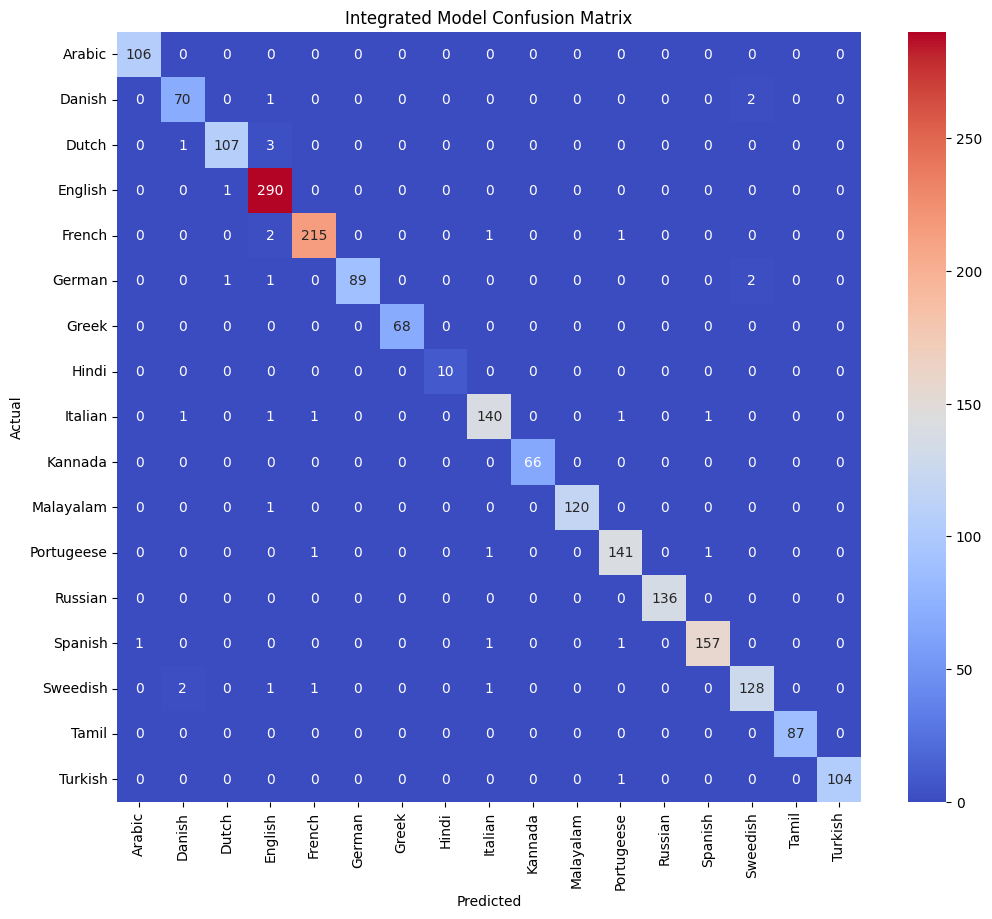

In [92]:
# Confusion Matrix for the integrated model
plt.figure(figsize=(12, 10))
cmx_model = confusion_matrix(y_test, y_pred_model)
sns.heatmap(cmx_model, annot=True, fmt="d", cmap='coolwarm', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Integrated Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 # TESTING

In [99]:
basic_model_pipe.predict(['िंदी भाषा कैसे आई?']) 

array(['Hindi'], dtype=object)

 # MODEL EVALUATION

In [100]:
# Evaluate the integrated model
model_accuracy = accuracy_score(y_test, y_pred_model)
model_f1 = f1_score(y_test, y_pred_model, average='weighted')
model_precision = precision_score(y_test, y_pred_model, average='weighted')
model_recall = recall_score(y_test, y_pred_model, average='weighted')

print(f"Integrated Model Accuracy: {model_accuracy:.4f}")
print(f"Integrated Model F1 Score: {model_f1:.4f}")
print(f"Integrated Model Precision: {model_precision:.4f}")
print(f"Integrated Model Recall: {model_recall:.4f}")

Integrated Model Accuracy: 0.9836
Integrated Model F1 Score: 0.9836
Integrated Model Precision: 0.9837
Integrated Model Recall: 0.9836


In [104]:
# Function to evaluate pipeline and return metrics
def evaluate_pipeline(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted')
    }

In [105]:
# Evaluate the best pipelines with the best parameters after hyperparameter tuning
best_rf_metrics = evaluate_pipeline(best_rf_model, X_train, X_test, y_train, y_test)
best_svm_metrics = evaluate_pipeline(best_svm_model, X_train, X_test, y_train, y_test)
best_nb_metrics = evaluate_pipeline(best_nb_model, X_train, X_test, y_train, y_test)

In [106]:
# Create a DataFrame to display results
tuned_results_df = pd.DataFrame([best_rf_metrics, best_svm_metrics, best_nb_metrics], index=['Random Forest', 'SVM', 'Naive Bayes'])


In [108]:
# Print the results in table form
print("\nTuned Model Evaluation Results:")
tuned_results_df


Tuned Model Evaluation Results:


,Accuracy,F1 Score,Precision,Recall
Random Forest,0.970019,0.970110,0.970766,0.970019
SVM,0.982592,0.982591,0.982741,0.982592
Naive Bayes,0.984526,0.984544,0.984751,0.984526


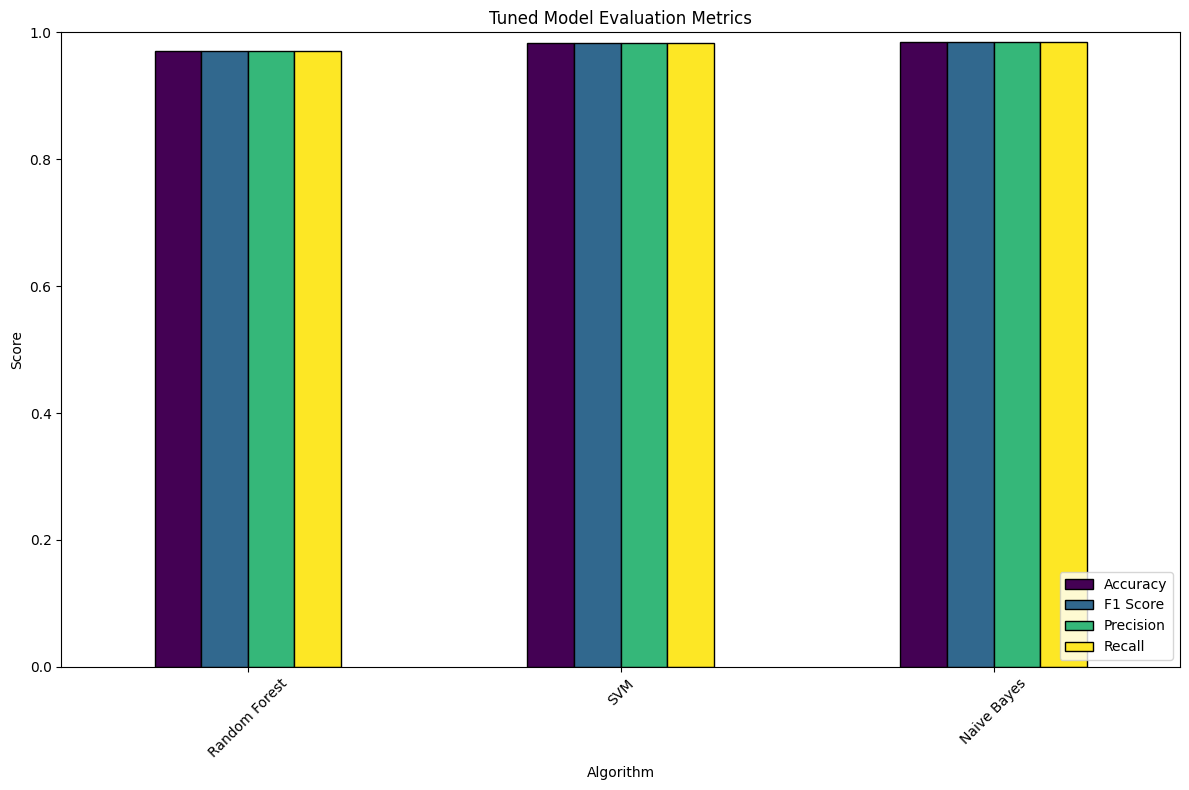

In [109]:

# Plot the evaluation metrics for tuned models
tuned_results_df.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')
plt.title('Tuned Model Evaluation Metrics')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.legend(loc='lower right')
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()



# TESTING

In [110]:
basic_model_pipe.predict(['िंदी भाषा कैसे आई?']) 

array(['Hindi'], dtype=object)

In [111]:
basic_model_pipe.predict(['']) 

array(['Arabic'], dtype=object)